# Which genre is produced more in a country

In [1]:
import pandas as pd
import os
import csv
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import cm

In [2]:
current_path =os.path.expanduser('~')
current_path =os.path.join(current_path,'Final_Exam')
input_path = os.path.join(current_path,'Data')
output_path = os.path.join(current_path,'Analysis')
output_path = os.path.join(output_path,'Analysis_3')

In [3]:
df_movies_countries = pd.read_csv( input_path + '\\movie_countries.csv', encoding='ISO-8859-1')#read movies csv file into a dataframe
df_movies_countries = df_movies_countries.rename(columns = {'movieID':'movieId'})
df_movies_countries.head()

,movieId,country
0,1,USA
1,2,USA
2,3,USA
3,4,USA
4,5,USA


In [4]:
df_movies = pd.read_csv( input_path + '\\movies.csv', encoding='ISO-8859-1')         #read movies csv file into a dataframe
df_movies.shape

(27278, 3)

In [5]:
df_movies = pd.merge(df_movies,df_movies_countries, on='movieId')
df_movies.head()
#df_movies.shape

,movieId,title,genres,country
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,USA
1,2,Jumanji (1995),Adventure|Children|Fantasy,USA
2,3,Grumpier Old Men (1995),Comedy|Romance,USA
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,USA
4,5,Father of the Bride Part II (1995),Comedy,USA


In [7]:
genre_types = list(df_movies.genres.str.split('|').values) #for each movie create a genre list
#genre_types[:5]

In [8]:
genre_list =[]     
for x in genre_types:                              #combine all the lists into one and find the distinct values of genres
    genre_list.extend(x)
genre_list = set(genre_list)
#genre_list

In [9]:
for i in genre_list:                                                             #for each genre create a column in the table 
    df_movies[i] = 0                                                        #initiate the count to zero
    df_movies[i] = df_movies['genres'].apply(lambda x : (re.findall(i, x))) #check if the movie belongs to that genre 
    df_movies[i] = df_movies[i].apply(lambda x : 0 if len(x)==0 else 1)     #if movie belongs to that genre set tha count to 1
df_movies.tail()

,movieId,title,genres,country,Fantasy,Thriller,War,Mystery,Children,Musical,...,Western,Crime,Action,Documentary,Romance,Film-Noir,Drama,IMAX,Adventure,Horror
10191,65088,Bedtime Stories (2008),Adventure|Children|Comedy,USA,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
10192,65091,Manhattan Melodrama (1934),Crime|Drama|Romance,USA,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
10193,65126,Choke (2008),Comedy|Drama,USA,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10194,65130,Revolutionary Road (2008),Drama|Romance,USA,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
10195,65133,Blackadder Back & Forth (1999),Comedy,UK,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_country_genre = df_movies.groupby('country')[ 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'].sum()
df_country_genre.head() 

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
country,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Algeria,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
Argentina,2,2,0,0,4,2,0,12,1,1,0,0,0,1,1,2,2,0,0
Aruba,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
Australia,13,22,4,7,48,9,3,61,4,1,8,2,5,6,21,8,18,9,6


In [11]:
df_country_genre = df_country_genre.reset_index()
df_country_genre.head()

,country,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Afghanistan,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Algeria,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,Argentina,2,2,0,0,4,2,0,12,1,1,0,0,0,1,1,2,2,0,0
3,Aruba,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,Australia,13,22,4,7,48,9,3,61,4,1,8,2,5,6,21,8,18,9,6


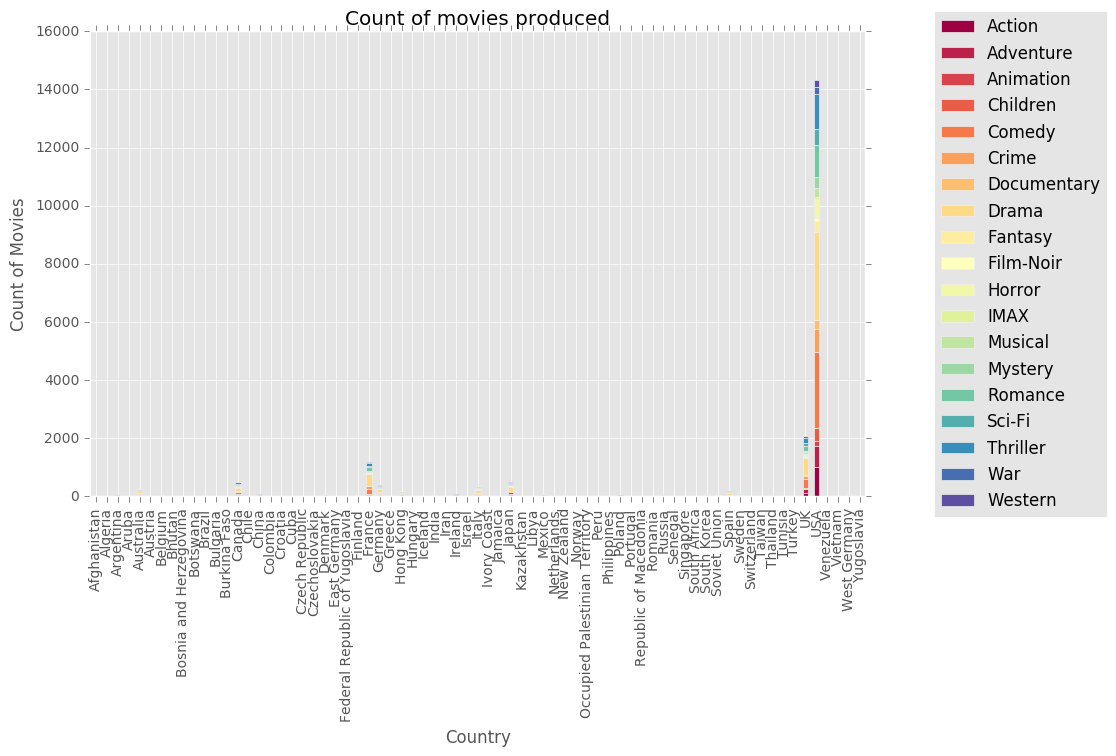

In [15]:
cmap = cm.get_cmap('Spectral')
ax = df_country_genre.plot.bar(x='country', y=['Action','Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'] , stacked = True, legend=False,cmap=cmap, figsize=(10,6) , title='Count of movies produced' )
plt.legend(loc=10, bbox_to_anchor=(1.2, .5), ncol=1)
ax.set_xlabel('Country')
ax.set_ylabel('Count of Movies')

In [ ]:
# for a particular genre what is the most popular shooting destination 

In [19]:
df_movies_location = pd.read_csv( input_path + '\\movie_locations.csv', encoding='ISO-8859-1')         #read movies csv file into a dataframe
df_movies_location.head()

,movieID,location1,location2,location3,location4
0,1,NaN,NaN,NaN,NaN
1,2,Canada,British Columbia,NaN,NaN
2,2,Canada,British Columbia,Delta,NaN
3,2,Canada,British Columbia,Delta,Tsawwassen
4,2,Canada,British Columbia,Maple Ridge,NaN


In [23]:
df = df_movies_location.groupby(['location1','location2']).count()
df

movieID  \
location1            location2                                            
Afghanistan          Kabul                                            1   
                     Yakubi                                           1   
Albania              Durres                                           1   
                     Shkoder                                          1   
                     Tirana                                           2   
Algeria              Algiers                                          5   
                     Djanet                                           1   
                     Fort Polignanc                                   1   
                     Timgad                                           1   
American Samoa       Pago Pago                                        1   
                     Tutuila Island                                   1   
Antarctica           Elephant Island                                  2   
                     French Southern and Antarctic Territories        1   
                     Terre Adélie                                     1   
Arctic               Applied Physics Laboratory Ice Station           1   
Argentina            Bariloche                                        1   
                     Ciudad Autónoma de Buenos Aires                  1   
                     Federal District                                41   
                     Iguazú National Park                             3   
                     Lago Frias                                       1   
                     Mendoza                                          2   
                     Misiones                                         7   
                     Neuquén                                          1   
                     Paraná River                                     3   
                     Parque Nacional Nahuel Huapi                     1   
                     Patagonia                                        2   
                     Rosario                                          1   
                     Salta                                            1   
                     San Juan                                         1   
                     Tierra del Fuego                                 3   
...                                                                 ...   
Ukraine              Kossiv National Park                             1   
                     Lviv                                             1   
                     Odessa                                           8   
United Arab Emirates Abu Dhabi                                        1   
                     Dubai                                            2   
Uruguay              Canelones                                        2   
                     Montevideo                                       7   
                     Punta del Este                                   2   
Uzbekistan           Khiva                                            1   
Venezuela            Amazona forests                                  1   
                     Caracas                                          4   
                     Estado Bolívar                                   3   
Vietnam              Da Nang                                          1   
                     Halong Bay                                       1   
                     Hanoi                                            2   
                     Ho Chi Minh City                                 3   
                     Hoa Lu                                           1   
                     Ninh Binh                                        1   
                     Quang Nam Province                               1   
Yugoslavia           Nicola                                           1   
                     Postojna cave                                    1   
Zimbabwe      